In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/josephhartono/Documents/GitHub/NBA-Draft-Biola-Summer-Research/gp_min_pi_year_ovr_YA.csv',index_col = [0])

#display(df5)
df.loc[6] = ['Dee Brown',21, 24.9,7.4,2006, 46, 0]
df.loc[104] = ['Dee Brown',72, 23.9,9.4,2007, 46, 1]
df.loc[158] = ['Dee Brown',49, 28.2,8.9,2008, 46, 2]
df.loc[284] = ['Dee Brown',38, 17.7,7.2,2009, 46, 3]
df.loc[538] = ['Dee Brown',7, 22.3,7.2,20010, 46, 4]
df.loc[750] = ['Dee Brown',7, 9.5,-1.8,2001, 46, 5]
df.loc[9] = ['Glen Rice',79,42.5,12.5,2013,35.0,0]
df.loc[96] = ['Glen Rice', 82, 40.2, 11.3, 2014, 35.0, 1]
df.loc[167] =   ['Glen Rice', 27, 36.5, 10.1, 2015, 35.0, 2]
df.loc[296] = ['Glen Rice', 80, 31.6, 11.1, 2016, 35.0, 3]
df.loc[521] = ['Glen Rice', 75, 29.5, 10.1, 2017, 35.0, 4]
df.loc[726] = ['Glen Rice', 20, 30.3, 4.9, 2018, 35.0, 5]
df.loc[874] =  ['Glen Rice', 62, 24.7, 7.7, 2019, 35.0, 6]
df.loc[1124] = ['Glen Rice', 18, 14.5, 6.2, 2020, 35.0, 7]
df.loc[26] = ['Patrick Ewing', 78, 37.0, 17.4, 2008, 43.0, 0]
df.loc[67] = ['Patrick Ewing', 26, 32.6, 17.5, 2009, 43.0, 1]
df.loc[209] = ['Patrick Ewing', 38, 34.2, 14.9, 2010, 43.0, 2]
df.loc[344] =  ['Patrick Ewing', 62, 32.8, 12.8, 2011, 43.0, 3]
df.loc[452] = ['Patrick Ewing', 79, 26.6, 8.8, 2012, 43.0, 4]
df.loc[645] =  ['Patrick Ewing', 65, 13.8, 9.7, 2013, 43.0, 5]
df.loc[3212] = ['Marcus Thornton', 73, 25.6, 10.2, 2015, 45.0, 0]
df.loc[3587] = ['Marcus Thornton', 73, 24.3, 11.3, 2016, 45.0, 1]
df.loc[3979] =  ['Marcus Thornton', 51, 34.9, 9.6, 2017, 45.0, 2]
df.loc[4369] = ['Marcus Thornton', 72, 24.0, 9.8, 2018, 45.0, 3]
df.loc[4749] =  ['Marcus Thornton', 72, 24.2, 7.4, 2019, 45.0, 4]
#df.to_csv('gp_min_pi_year_ovr_YA.csv')
display(df)

,PLAYER,GP,MIN,PIE,Year,overall,yearsAfter
0,Allen Iverson,76,40.0,10.7,1996,1.0,0
1,Amal McCaskill,17,6.4,5.4,1996,49.0,0
2,Antoine Walker,82,36.2,9.4,1996,6.0,0
3,Ben Davis,20,4.9,2.2,1996,43.0,0
4,Brian Evans,14,4.1,6.7,1996,27.0,0
...,...,...,...,...,...,...,...
8724,Joffrey Lauvergne,0,0.0,0.0,2013,55.0,0
8725,Greg Oden,0,0.0,0.0,2007,1.0,0
8726,Greg Oden,0,0.0,0.0,2010,1.0,3
8727,Greg Oden,0,0.0,0.0,2011,1.0,4


In [12]:



XX = []
XXs = []
YY = []
YYs = []
count = 0
for ovr in set(df['overall']):
    df1 = df[df['overall'] == ovr]
    all_pies = []
    all_gp = []
    for nm in set(df1['PLAYER']):
        pies = []
        gp = []
        for i in range(0,4):
            try:
                df2 = df1[(df1['PLAYER'] == nm) & (df1['yearsAfter'] == i)]
                df2 = df2.head(1)
                stats = df2.values[0]
                pies.append(stats[3])
                if stats[1] == 0:
                    add = 1
                else:
                    add = 0
                gp.append(stats[1] + add)            
            except:
                pies.append(1)
                gp.append(1)
        all_pies.append(pies)
        all_gp.append(gp)
#     display(all_gp)
    z=np.sum(all_gp,1)
    #print(all_gp)

#     print(z) #gp totals 253 301 113
    apgn=(np.array(all_gp).T/z).T
#     print(apgn) #gp/gp totals [0.22529644 0.31620553 0.29249012 0.16600791]
    apies=np.array(all_pies)
#     print(apies)  #pies of 4 years [ 7.1  9.1 11.2  6.3]
    xx=np.sum(apgn*apies,1) #average pie accross 4 years
    #print(xx) #[ 8.79881423 15.54451827  8.95132743 ...
    yy=np.sum(apies*np.array(all_gp),1)
    #print(yy) #[2226.1 4678.9 1011.5 2953.4
    
    XX.append(xx.mean())
    XXs.append(xx.std())    
    
    YY.append(yy.mean())
    YYs.append(yy.std())    
YY = np.array(YY)
YYs = np.array(YYs)


ex = sum(YYs)/60
ey = sum(YY)/60
display(ex/ey)

display(sum(YYs)/60)
display(sum(YY)/60)
# display(YYs.mean())

0.67840131015407

859.9565231970671

1267.6221438926239

<Figure size 640x480 with 0 Axes>

<Figure size 2400x1200 with 0 Axes>

<Figure size 2400x1200 with 0 Axes>

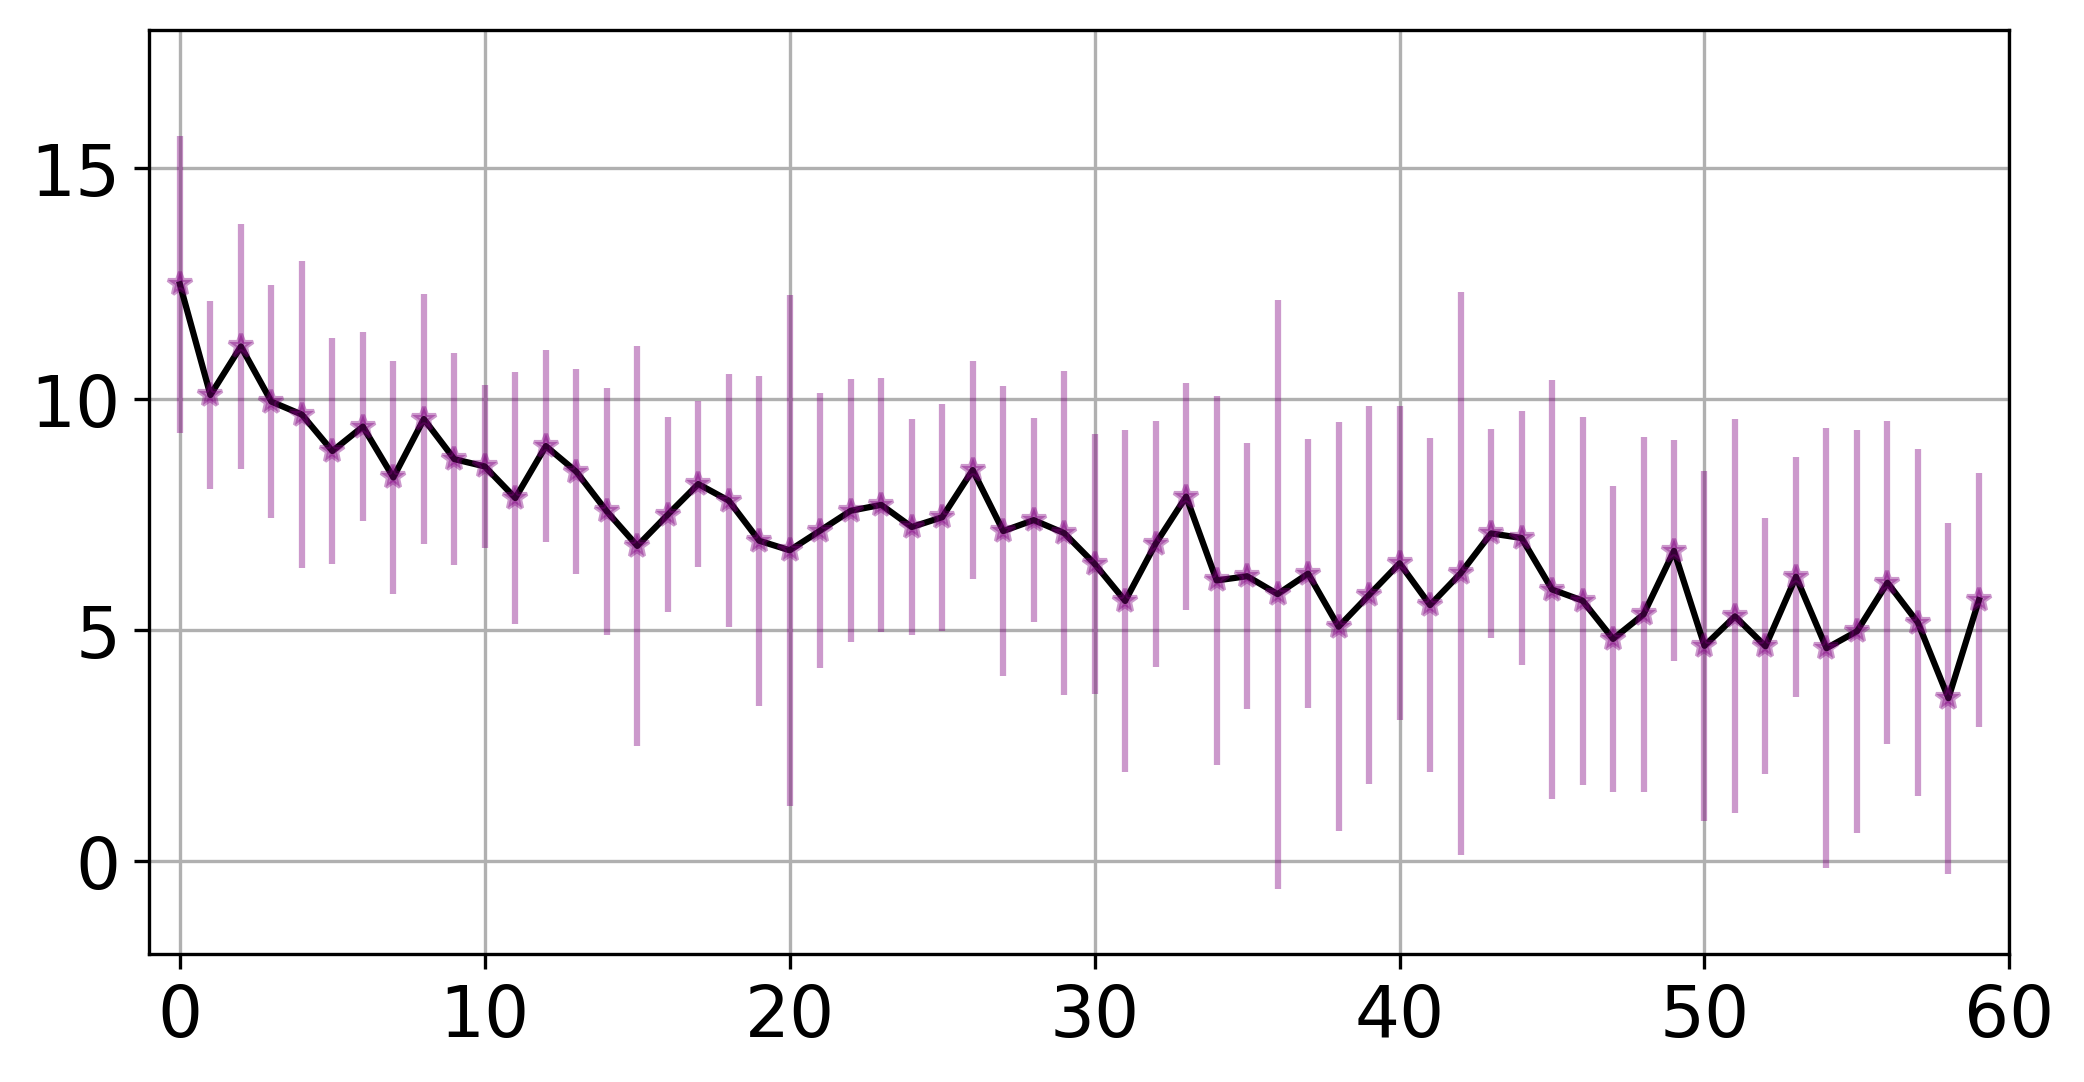

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

plt.clf()
ax = plt.figure(dpi=300,figsize=(8,4)).add_subplot()
x = np.arange(0.0, 60.0, 1)
ax.errorbar(x, XX, XXs, alpha = 0.4,ls='none',c='purple',marker='*')
ax.plot(x,XX,c='black')

    
ax.set_xlim(-1, 60)
ax.set_ylim(-2, 18)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)

ax.grid()
#ax.legend(['Drafted Season', 'Second Season', 'Third Season'])
#plt.legend(loc="upper left", bbox_to_anchor=(1.2,1.0))

#     plt.savefig('SixteenPie.png')
plt.show() 

#pie of first 4 years vs draft pick
#x-axis is draft pick
#y-axis is total average PIE of 4 years

<Figure size 640x480 with 0 Axes>

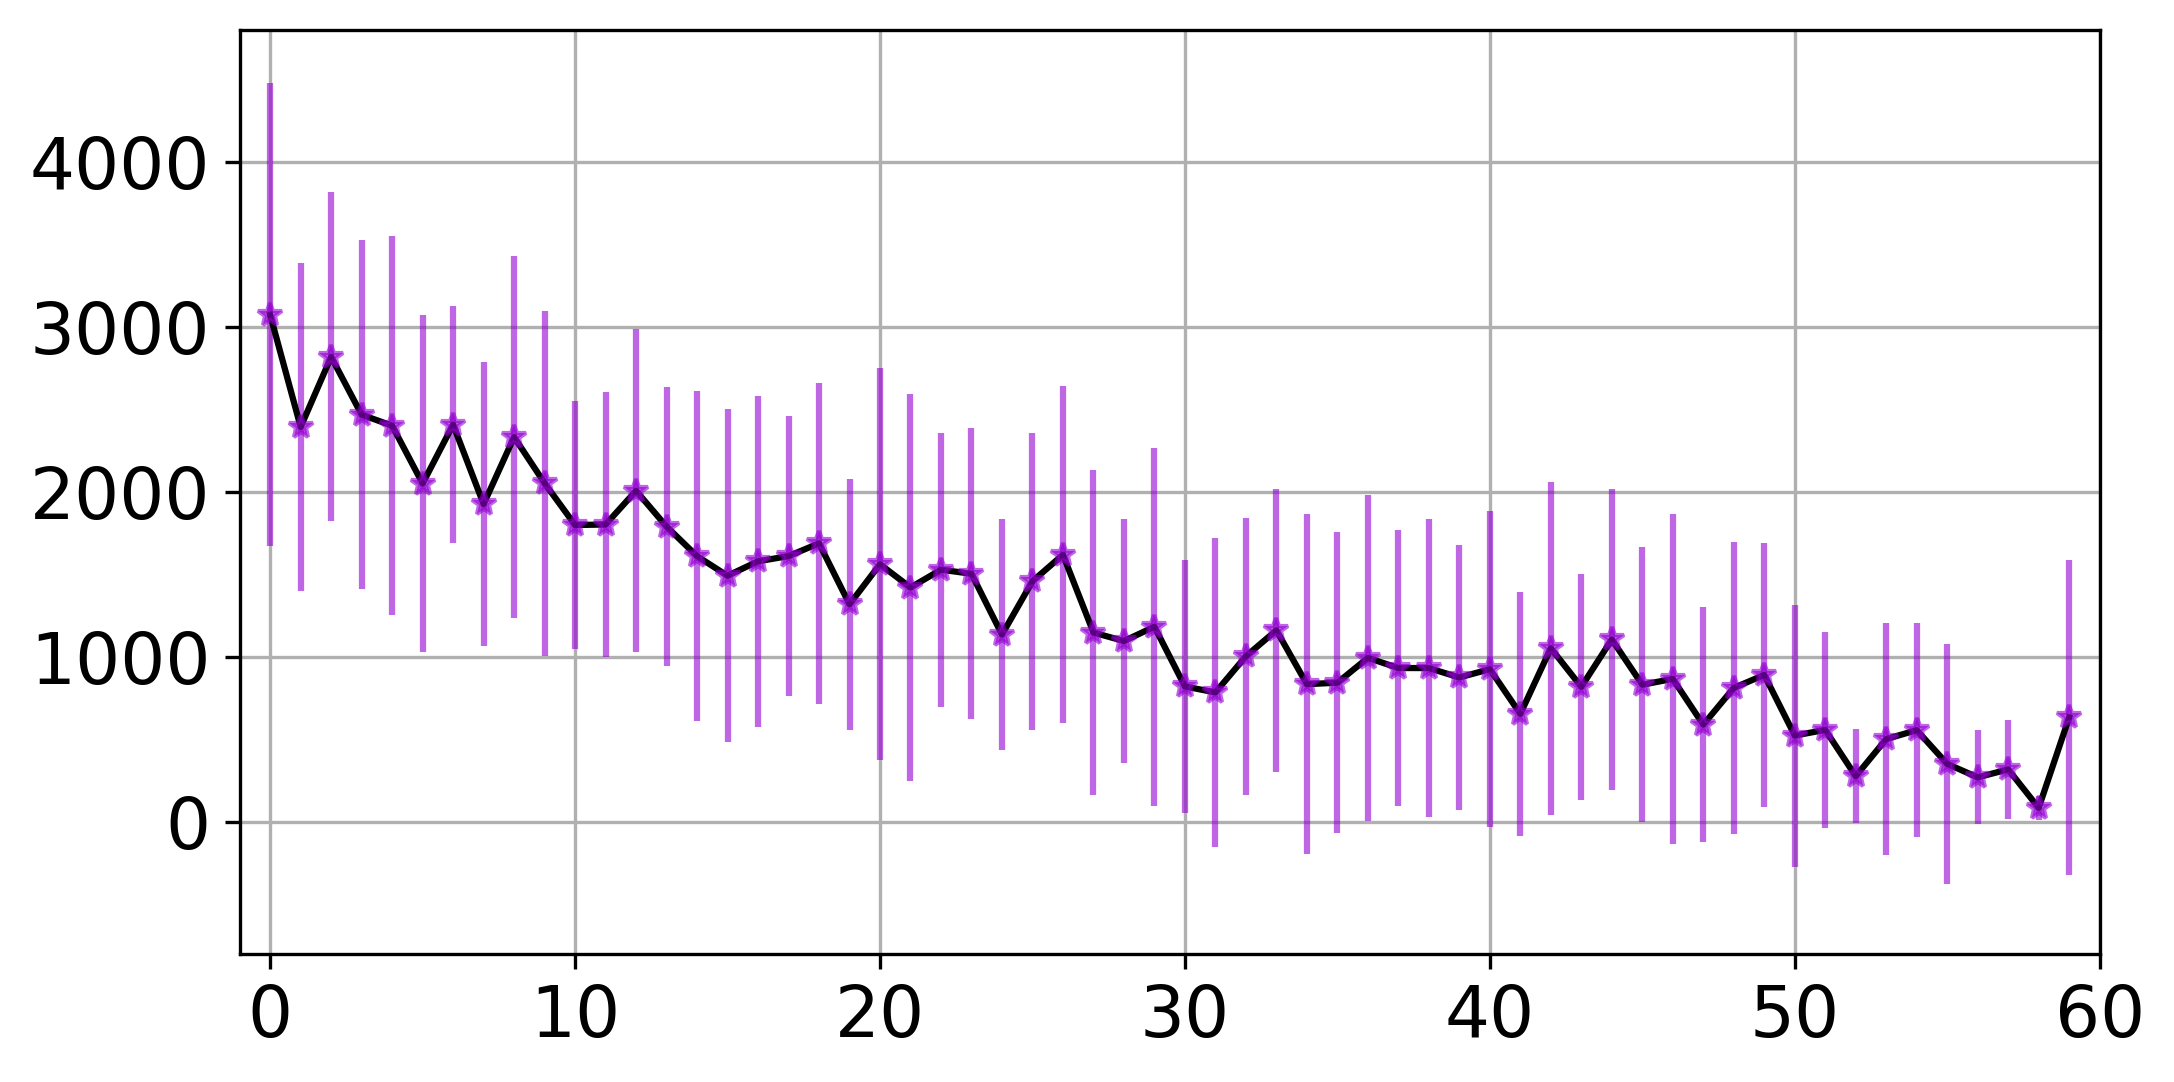

In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

plt.clf()
ax = plt.figure(dpi=300,figsize=(8,4)).add_subplot()
x = np.arange(0.0, 60.0, 1)
ax.errorbar(x, YY, YYs, alpha = 0.6,ls='none',c='darkviolet',marker='*')
ax.plot(x,YY,c='black')

    
ax.set_xlim(-1, 60)
ax.set_ylim(-800, 4800)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)

ax.grid()
#ax.legend(['Drafted Season', 'Second Season', 'Third Season'])
#plt.legend(loc="upper left", bbox_to_anchor=(1.2,1.0))

plt.savefig('TotalPie vs OVR.png')
plt.show() 



#total pie average of first 4 years vs draft pick
#x-axis is draft pick
#y-axis is total average PIE of first 4 years normalized by the number of games played

In [81]:
print(XXs, YYs)

[3.20849274085668, 2.0342398089383904, 2.643045289453568, 2.525948666252412, 3.3282103266523673, 2.441645983292403, 2.044369144824444, 2.514248695885981, 2.7016627572124814, 2.2950371125579903, 1.7729966867364237, 2.718427501002435, 2.0790956292206273, 2.2224686709134702, 2.6716872221056263, 4.328180449560206, 2.115564223361936, 1.8011770580058777, 2.7447431801288977, 3.5722629060737914, 5.534179577894224, 2.975505954224281, 2.8444247831552856, 2.7436469380775783, 2.335350901473544, 2.4574016261536777, 2.354740596392607, 3.132469154200102, 2.199611179795117, 3.5133526302710196, 2.8087886118025716, 3.6914588209808694, 2.663676279200174, 2.454804264210773, 4.001673405584866, 2.884928774992532, 6.374860179961104, 2.912574365745552, 4.426151743019621, 4.083863511354184, 3.395731830935562, 3.6121499579063023, 6.094481026223241, 2.2636896191862146, 2.7547262182678165, 4.5339241122172185, 3.9815164651058605, 3.3067274701863716, 3.8396131368807476, 2.3886211415679885, 3.7845295749760917, 4.265